# Book Recommendation System (Clustering-unsupervised) 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading

In [111]:
books=pd.read_csv('./dataset/Books.csv',sep=";",encoding='latin-1',error_bad_lines=False)

c:\Users\dell\.conda\envs\gputest\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'


b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\Users\dell\.conda\envs\gputest\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [112]:
users=pd.read_csv('./dataset/Users.csv',sep=";",encoding='latin-1',error_bad_lines=False)

In [113]:
ratings=pd.read_csv('./dataset/Book-Ratings.csv',sep=";",encoding='latin-1',error_bad_lines=False)

## PipeLine for the project
- 1. Data cleaning
- 2. EDA
- 3. Data Processing
- 4. Model building
- 5. Evaluation
- 6. deploy

## 1. Data Cleaning (understanding)

In [114]:
# Books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [115]:
books.shape

(271360, 8)

In [116]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [117]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [118]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

- Missing values are very less
- Rename the columns
- will change the data type of `ISBN` and `Year-Of-Publication`
- will will drop the `Image-URL-S` and `Image-URL-L` as they are of no use
- we will also make new data having all the columns except images for model

### Books

In [119]:
books.rename(columns={"Book-Title":'title','Book-Author':'author','Year-Of-Publication':'year','Image-URL-M':'image'},inplace=True)

In [120]:
books.head()

,ISBN,title,author,year,Publisher,Image-URL-S,image,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


There is some rows with errors we will be dropping it

In [121]:
books.year.value_counts().tail(60)

1932                 3
1948                 3
2006                 3
1942                 2
1932                 2
1933                 2
1945                 2
DK Publishing Inc    2
1941                 2
1933                 2
1939                 2
1902                 2
1925                 2
2020                 2
1928                 2
1931                 2
1922                 2
2050                 2
1949                 2
1909                 2
1900                 2
1943                 2
1921                 2
1936                 2
2010                 2
1946                 2
2020                 1
2011                 1
Gallimard            1
1378                 1
1897                 1
2024                 1
1376                 1
2008                 1
1926                 1
1919                 1
1906                 1
1938                 1
2038                 1
2011                 1
1926                 1
1904                 1
1927                 1
1914       

In [122]:
books[books.year.isin(['Gallimard','DK Publishing Inc'])]

,ISBN,title,author,year,Publisher,Image-URL-S,image,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [123]:
books.drop(books[books.year.isin(['Gallimard','DK Publishing Inc'])].index.values,inplace=True)

In [124]:
books['year']=books.year.astype(int)

In [125]:
# these years are not possible so we will be removing this columns too
books.drop(books[books.year>2023].index.values,inplace=True)

In [126]:
Books=books.drop(['Image-URL-S','image','Image-URL-L'],axis=1)

In [127]:
books.drop(['Image-URL-S','Image-URL-L'],axis=1,inplace=True)

In [128]:
# final Book data
Books.head()

,ISBN,title,author,year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Users

In [129]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [130]:
users.shape

(278858, 3)

In [131]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [132]:
users.isna().sum()/users.shape[0]*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

We will be dropping the `Age` columns as it is not useful for our model also have alot of missing values

In [133]:
users.drop(['Age'],axis=1,inplace=True)

In [134]:
users.shape

(278858, 2)

### Ratings

In [135]:
ratings.shape

(1149780, 3)

In [136]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [137]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [138]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [139]:
ratings.rename(columns={'Book-Rating':'rating','User-ID':'user'},inplace=True)

## 2. EDA

### Books

In [140]:
Books.head()

,ISBN,title,author,year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [141]:
len(Books.ISBN.unique())

271344

In [142]:
len(Books.title.unique())

242120

<AxesSubplot:>

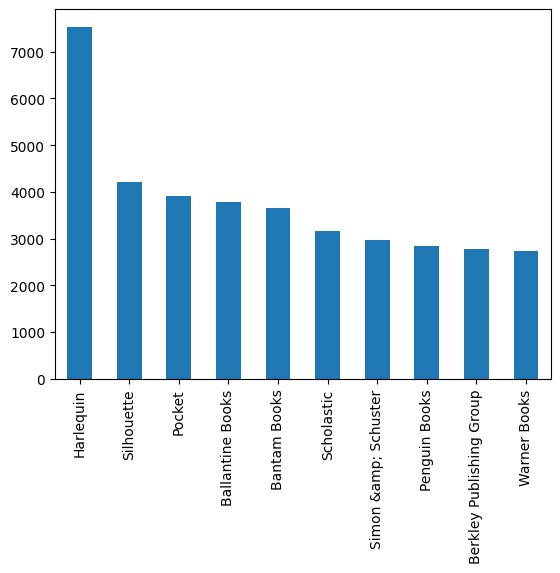

In [143]:
# top 10 publisher
Books.Publisher.value_counts().head(10).plot.bar()

<AxesSubplot:>

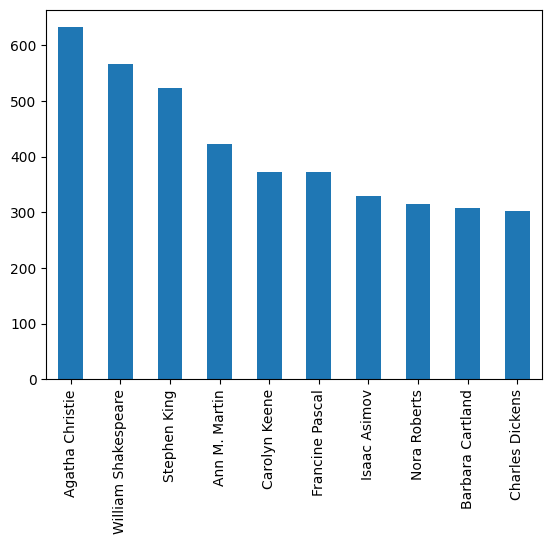

In [144]:
# top 10 authors
Books.author.value_counts().head(10).plot.bar()

In [145]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [146]:
ratings

,user,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [147]:
ratings.rating.describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

<AxesSubplot:>

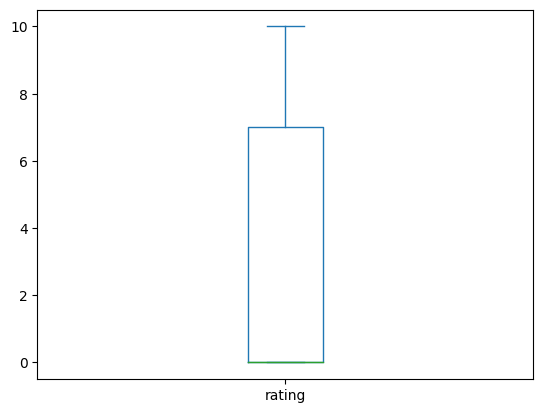

In [148]:
ratings.rating.plot.box()

In [149]:
ratings.groupby('user').count()['rating'].sort_values(ascending=False)

user
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
118579        1
118576        1
118574        1
118563        1
139146        1
Name: rating, Length: 105283, dtype: int64

In [150]:
ratings_by_users=ratings.groupby('user').count()['rating'].sort_values(ascending=False)

In [151]:
# rating by number of users
ratings_by_users.shape

(105283,)

In [152]:
ratings_by_users.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: rating, dtype: float64

<AxesSubplot:>

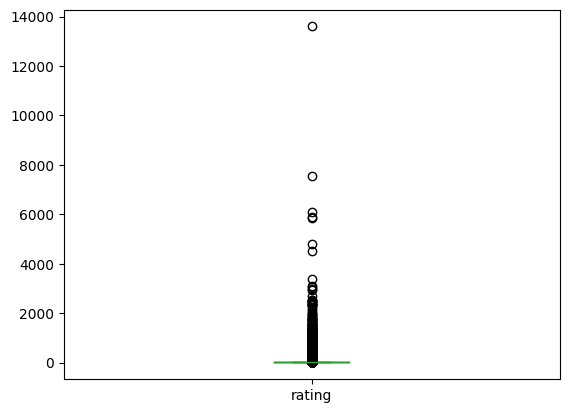

In [153]:
ratings_by_users.plot.box()

here are many users who have rated only one books which are not useful for our model so will will set the createria of the users number of rating which will be suitable for our model

In [154]:
ratings_on_books=ratings.groupby('user').count()['ISBN'].sort_values(ascending=False)

In [155]:
# number of books reviewed
ratings_on_books.shape

(105283,)

In [156]:
ratings_on_books.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: ISBN, dtype: float64

<AxesSubplot:>

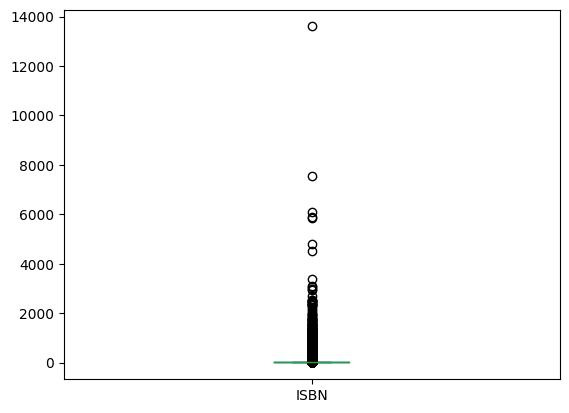

In [157]:
ratings_on_books.plot.box()

here are many books that have handful amount of ratings which are not useful for our model so will will set the createria of the books rating which will be suitable for our model

## 3. Data Processing

#### We want the final data in which
- each users have reviewed >=200 books
- each book have >=50 reviews

In [158]:
uidx=ratings_by_users[ratings_by_users>200].index
len(uidx) # number of users

899

In [159]:
# users have reviewed >=200 books
data=ratings[ratings.user.isin(uidx)]

In [160]:
ratings.shape

(1149780, 3)

In [161]:
data.shape

(526356, 3)

Out of `1149780` ratings  `526356` ratings are done by only `899 users`

In [162]:
data=data.merge(Books,on='ISBN')

In [163]:
rating_by_title=data.groupby('title')['rating'].count().reset_index()

In [164]:
rating_by_title.rename(columns={'rating':'no_of_rating'},inplace=True)

In [165]:
data=data.merge(rating_by_title,on='title')

In [166]:
# book have >=50 reviews
data=data[data.no_of_rating>50]

In [167]:
data

,user,ISBN,rating,title,author,year,Publisher,no_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228873,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228874,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228875,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228876,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


Checking if the same user have reviwed the same book multiple times

In [168]:
data[data.duplicated(['user','title'])]

,user,ISBN,rating,title,author,year,Publisher,no_of_rating
702,11676,0440977096,10,The Secret Garden,Frances Hodgson Burnett,1989,Laure Leaf,79
710,11676,0879236493,9,The Secret Garden,Frances Hodgson Burnett,1987,David R. Godine Publisher,79
717,35050,0439099390,0,The Secret Garden,Frances Hodgson Burnett,1999,Scholastic,79
721,174791,0439099390,0,The Secret Garden,Frances Hodgson Burnett,1999,Scholastic,79
722,230522,0439099390,0,The Secret Garden,Frances Hodgson Burnett,1999,Scholastic,79
...,...,...,...,...,...,...,...,...
223470,172030,0821744941,9,Dark Angel,Anna Grant,1994,Zebra Books,54
223475,153662,0505524147,0,Dark Angel,Cassandra Collins,2000,Love Spell,54
228867,113270,0743439651,0,Still Waters,Jennifer Lauck,2001,Atria,83
228868,162639,0743439651,0,Still Waters,Jennifer Lauck,2001,Atria,83


In [169]:
#  dropping the duplicate values
data.drop_duplicates(['user','title'],keep='first',inplace=True)

In [170]:
# final data
data

,user,ISBN,rating,title,author,year,Publisher,no_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228872,268110,0743439651,0,Still Waters,Jennifer Lauck,2001,Atria,83
228873,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228874,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228875,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [171]:
data.shape

(57952, 8)

In [172]:
data.groupby('title')['ISBN'].count()

title
1984                                                                  72
1st to Die: A Novel                                                  153
2nd Chance                                                           115
4 Blondes                                                             71
84 Charing Cross Road                                                 51
                                                                    ... 
Year of Wonders                                                       59
You Belong To Me                                                      56
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values     62
Zoya                                                                  58
\O\" Is for Outlaw"                                                   98
Name: ISBN, Length: 703, dtype: int64

In [173]:
# total number of books left
len(data.title.unique())

703

In [174]:
books.ISBN.unique().shape

(271344,)

out of `271344` books we will keep data for only `2044` as we can surely recommend these books as they are the most popular amongst the users

In [175]:
books=books[books.title.isin(data.title.unique())]
books.drop_duplicates('title',inplace=True)

In [176]:
books.to_csv('final_books.csv',sep=';')

## 4. Model 

In [177]:
final_data=data.pivot_table(columns='user',index='title',values='rating',aggfunc='count')

In [178]:
final_data.fillna(0,inplace=True)

In [179]:
final_data

user,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [180]:
from scipy.sparse import csc_matrix

In [181]:
sparse_data=csc_matrix(final_data)

In [182]:
final_data

user,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [183]:
from sklearn.neighbors import NearestNeighbors

In [184]:
model=NearestNeighbors(algorithm='brute')

In [185]:
model.fit(final_data)

NearestNeighbors(algorithm='brute')

In [186]:
final_data.iloc[20,:].values.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 

In [187]:
model.n_neighbors?

Type:        int
String form: 5
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


In [188]:
distance,suggestions=model.kneighbors(final_data.iloc[182,:].values.reshape(1,-1),n_neighbors=10)
b_title=[]
for i in suggestions[0][1:]:
    b_title.append(final_data.index[i])
# books[books.title.isin(b_title)]
# b_title
books[books.title.isin(b_title)]

,ISBN,title,author,year,Publisher,image
1029,0345348036,The Princess Bride: S Morgenstern's Classic Ta...,WILLIAM GOLDMAN,1987,Del Rey,http://images.amazon.com/images/P/0345348036.0...
1220,0786866276,Mother of Pearl,Melinda Haynes,1999,Hyperion,http://images.amazon.com/images/P/0786866276.0...
1779,0380727501,Notes from a Small Island,Bill Bryson,1997,Perennial,http://images.amazon.com/images/P/0380727501.0...
4648,0515119784,Range of Motion,Elizabeth Berg,1996,Jove Books,http://images.amazon.com/images/P/0515119784.0...
5283,0142001430,Year of Wonders,Geraldine Brooks,2002,Penguin Books,http://images.amazon.com/images/P/0142001430.0...
5947,0679439382,The Little Friend,Donna Tartt,2002,Alfred A. Knopf,http://images.amazon.com/images/P/0679439382.0...
11309,0375411550,The Bluest Eye,Toni Morrison,2000,Knopf,http://images.amazon.com/images/P/0375411550.0...
11318,0316781010,Fortune's Rocks: A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316781010.0...
12401,038542017X,Like Water for Chocolate : A Novel in Monthly ...,LAURA ESQUIVEL,1995,Anchor,http://images.amazon.com/images/P/038542017X.0...


In [189]:
def recommend_books(b_title):
    bid=np.where(final_data.index==b_title)[0][0]
#     print(bid)
    distance,suggestions=model.kneighbors(final_data.iloc[bid,:].values.reshape(1,-1),n_neighbors=6)
    print(distance)
    b_title=[]
    for i in suggestions[0][1:]:
        b_title.append(final_data.index[i])
    return books[books.title.isin(b_title)] 
    

In [190]:
recommend_books('Year of Wonders')

[[0.         9.16515139 9.16515139 9.2736185  9.38083152 9.38083152]]


,ISBN,title,author,year,Publisher,image
1553,0375725784,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,Vintage Books USA,http://images.amazon.com/images/P/0375725784.0...
2643,0802139256,Peace Like a River,Leif Enger,2002,Grove Press,http://images.amazon.com/images/P/0802139256.0...
3787,0452283205,Falling Angels,Tracy Chevalier,2002,Plume Books,http://images.amazon.com/images/P/0452283205.0...
10504,140003065X,A Fine Balance,Rohinton Mistry,2001,Vintage Books USA,http://images.amazon.com/images/P/140003065X.0...
11309,0375411550,The Bluest Eye,Toni Morrison,2000,Knopf,http://images.amazon.com/images/P/0375411550.0...


In [191]:
recommend_books('The Bluest Eye')

[[0.         8.83176087 8.88819442 8.88819442 8.88819442 8.94427191]]


,ISBN,title,author,year,Publisher,image
2912,0142001805,The Eyre Affair: A Novel,Jasper Fforde,2003,Penguin Books,http://images.amazon.com/images/P/0142001805.0...
2957,0451204948,A Day Late and a Dollar Short,Terry McMillan,2002,Signet Book,http://images.amazon.com/images/P/0451204948.0...
2995,0452260116,Song of Solomon (Oprah's Book Club (Paperback)),Toni Morrison,1987,Plume Books,http://images.amazon.com/images/P/0452260116.0...
4478,0425152251,Sophie's World: A Novel About the History of P...,Jostein Gaarder,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425152251.0...
6628,0060921145,Animal Dreams,Barbara Kingsolver,1991,Perennial,http://images.amazon.com/images/P/0060921145.0...


## 5. Deploy

In [192]:
import pickle

In [193]:
pickle.dump(model,open('books_model.pkl','wb'))
final_data.to_csv('final_data.csv')

## Testing

In [194]:
m=pickle.load(open('books_model.pkl','rb'))
d=pd.read_csv('final_data.csv',index_col=0)

In [195]:
def recommend_book(b_title):
    bid=np.where(d.index==b_title)[0][0]
#     print(bid)
    distance,suggestions=m.kneighbors(final_data.iloc[bid,:].values.reshape(1,-1),n_neighbors=6)
    b_title=[]
    for i in suggestions[0][1:]:
        b_title.append(final_data.index[i])
    return books[books.title.isin(b_title)] 

In [196]:
recommend_book('The Bluest Eye')

,ISBN,title,author,year,Publisher,image
2912,0142001805,The Eyre Affair: A Novel,Jasper Fforde,2003,Penguin Books,http://images.amazon.com/images/P/0142001805.0...
2957,0451204948,A Day Late and a Dollar Short,Terry McMillan,2002,Signet Book,http://images.amazon.com/images/P/0451204948.0...
2995,0452260116,Song of Solomon (Oprah's Book Club (Paperback)),Toni Morrison,1987,Plume Books,http://images.amazon.com/images/P/0452260116.0...
4478,0425152251,Sophie's World: A Novel About the History of P...,Jostein Gaarder,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425152251.0...
6628,0060921145,Animal Dreams,Barbara Kingsolver,1991,Perennial,http://images.amazon.com/images/P/0060921145.0...


In [197]:
d

,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
